# Analyzing California's Bridges (National Bridge Inventory Database, 2019):

The dataset used for this analysis is obtained from the Federal Highway Administration (FHWA). FHWA website consists of databases from all states' Departments of Transportation (DOT) nationwide. This specific analysis has been conducted on California's bridge inventory dataset (25,772 bridges as of 2019). 

The dataset is not a csv formatted version. It is imported and converted to a csv format without headings. Initially, throughout this analysis, it is expected to clean, wrangle, and organize the dataset prior to analysis. 

Recording and Coding Guide for the Structure Inventory and Appraisal of the Nation's Bridges:
https://www.fhwa.dot.gov/bridge/mtguide.pdf

Link to the FHWA CA 2019 Bridge Inventory Dataset:

Disclaimer:
https://www.fhwa.dot.gov/bridge/nbi/disclaim.cfm?nbiYear=2019&nbiState=CA19

Dataset:
https://www.fhwa.dot.gov/bridge/nbi/2019/CA19.txt


## 1.0 Importing Python Necessary Modules and Dataset:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing 

In [40]:
# https://hifld-geoplatform.opendata.arcgis.com/datasets/a9b05a595ff94f3fa3888d1240545740_0/geoservice?geometry=-137.409%2C33.729%2C-104.032%2C39.880
# The data is last updated March 20th of 2020. It includes every bridge infrastructure in the United States. 

filename = 'National_Bridge_Inventory__NBI__Bridges (03-2020).csv'
df = pd.read_csv(filename)
df

C:\Users\hhota\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,12,14,24,38,43,44,45,46,78,80,82,103,105,109,114,115,116,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,objectid,status,date,longdd,latdd,state_code_001,structure_number_008,record_type_005a,...,pier_protection_111,bridge_len_ind_112,scour_critical_113,future_adt_114,year_of_future_adt_115,min_nav_clr_mt_116,fed_agency,cat10,cat23,cat29
0,-8.894644e+06,4.762692e+06,1,AM,1202,79.901700,39.285800,54,00000000001A001,1,...,NaN,Y,8,225.0,2035.0,NaN,N,F,5,37
1,-8.894892e+06,4.763066e+06,2,AM,1202,79.904289,39.288469,54,00000000001A002,1,...,NaN,Y,8,225.0,2035.0,NaN,N,F,5,38
2,-8.895437e+06,4.763198e+06,3,AM,1202,79.908969,39.289381,54,00000000001A003,1,...,NaN,Y,8,236.0,2035.0,NaN,N,F,5,153
3,-8.890840e+06,4.749713e+06,4,AM,1202,79.868061,39.195589,54,00000000001A006,1,...,NaN,Y,7,25.0,2035.0,NaN,N,F,5,40
4,-8.911533e+06,4.743226e+06,5,MM,603,80.053811,39.150481,54,00000000001A007,1,...,NaN,Y,8,1133.0,2035.0,NaN,N,P,4,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616091,0.000000e+00,3.725290e-09,616092,XX,419,0.000000,0.000000,4,07263,1,...,NaN,Y,8,5010.0,2034.0,0.0,N,G,8,215
616092,0.000000e+00,3.725290e-09,616093,XX,419,0.000000,0.000000,4,08135,1,...,NaN,Y,8,359.0,2037.0,NaN,N,P,4,83
616093,0.000000e+00,3.725290e-09,616094,XX,419,0.000000,0.000000,4,08898,1,...,NaN,Y,8,3160.0,2030.0,NaN,N,F,6,420
616094,0.000000e+00,3.725290e-09,616095,XX,419,0.000000,0.000000,4,10618,1,...,1.0,Y,5,210.0,2030.0,NaN,N,F,5,817


## 2.0 Data Cleaning and Wrangling:

## 2.1 Extracting CA's Bridges & Data Standardization:

In [41]:
df_ca = df[df['state_code_001'] == 6]

df_ca = df_ca.drop(['X','Y','objectid','status','record_type_005a','route_number_005d','place_code_004','critical_facility_006b','kilopoint_011','base_hwy_network_012','lrs_inv_route_013a','subroute_no_013b','lat_016','long_017'], axis=1)

df_ca = pd.DataFrame(data = df_ca)

df_ca = df_ca.reset_index()

df_ca

,index,date,longdd,latdd,state_code_001,structure_number_008,route_prefix_005b,service_level_005c,direction_005e,highway_district_002,...,pier_protection_111,bridge_len_ind_112,scour_critical_113,future_adt_114,year_of_future_adt_115,min_nav_clr_mt_116,fed_agency,cat10,cat23,cat29
0,103282,603,-124.051719,41.545656,6,01 0002,2.0,1.0,0.0,1,...,NaN,Y,8,6937.0,2035.0,NaN,N,F,5,240
1,103283,1202,-124.059000,41.558094,6,01 0003,2.0,1.0,0.0,1,...,NaN,Y,4,6937.0,2034.0,NaN,N,F,5,316
2,103284,1202,-124.069039,41.568356,6,01 0004,2.0,1.0,0.0,1,...,NaN,Y,8,6937.0,2035.0,NaN,N,F,5,372
3,103285,1202,-124.101011,41.604578,6,01 0005,2.0,1.0,0.0,1,...,NaN,Y,8,6121.0,2034.0,NaN,N,G,7,1646
4,103286,1202,-124.082533,41.806692,6,01 0006,2.0,1.0,0.0,1,...,NaN,Y,8,6019.0,2036.0,NaN,N,G,7,2544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25732,129014,419,0.000000,0.000000,6,051953000003009,6.0,0.0,0.0,0,...,NaN,Y,6,75.0,2038.0,0.0,Y,G,8,53
25733,129015,419,0.000000,0.000000,6,051953000003010,6.0,0.0,0.0,0,...,NaN,Y,6,75.0,2038.0,0.0,Y,G,8,43
25734,129016,419,0.000000,0.000000,6,DAPFORLIG000785,8.0,0.0,0.0,0,...,NaN,Y,8,60.0,2037.0,NaN,Y,F,6,46
25735,129017,419,0.000000,0.000000,6,M6--14.508,6.0,0.0,0.0,0,...,NaN,Y,2,75.0,2038.0,0.0,Y,F,5,58


## 2.1.1 Coverting CA County Codes to County Names per FIPS Codes:

In [42]:
df_ca_counties = df_ca['county_code_003']
df_ca_counties = pd.DataFrame(data = df_ca_counties)

geocode = pd.read_csv('geocodes.csv')
gc = geocode.set_index('cc')
gc = gc.transpose()
gc = gc.to_dict()

source_cols = df_ca_counties.columns
new_cols = [str(x) + "_" for x in source_cols]
categories = gc
 
df_ca_counties[new_cols] = df_ca_counties[source_cols].applymap(categories.get)

df_ca['county_name'] = df_ca_counties['county_code_003_']

df_ca = df_ca.drop(['county_code_003'], axis=1)

df_ca.head()

,index,date,longdd,latdd,state_code_001,structure_number_008,route_prefix_005b,service_level_005c,direction_005e,highway_district_002,...,bridge_len_ind_112,scour_critical_113,future_adt_114,year_of_future_adt_115,min_nav_clr_mt_116,fed_agency,cat10,cat23,cat29,county_name
0,103282,603,-124.051719,41.545656,6,01 0002,2.0,1.0,0.0,1,...,Y,8,6937.0,2035.0,NaN,N,F,5,240,{'c': 'Del Norte County'}
1,103283,1202,-124.059000,41.558094,6,01 0003,2.0,1.0,0.0,1,...,Y,4,6937.0,2034.0,NaN,N,F,5,316,{'c': 'Del Norte County'}
2,103284,1202,-124.069039,41.568356,6,01 0004,2.0,1.0,0.0,1,...,Y,8,6937.0,2035.0,NaN,N,F,5,372,{'c': 'Del Norte County'}
3,103285,1202,-124.101011,41.604578,6,01 0005,2.0,1.0,0.0,1,...,Y,8,6121.0,2034.0,NaN,N,G,7,1646,{'c': 'Del Norte County'}
4,103286,1202,-124.082533,41.806692,6,01 0006,2.0,1.0,0.0,1,...,Y,8,6019.0,2036.0,NaN,N,G,7,2544,{'c': 'Del Norte County'}


## 2.1.2 Decoding (route_prefix_005b) per NBI Codes:

In [43]:
df_rte_pfix = df_ca['route_prefix_005b']
df_rte_pfix = pd.DataFrame(data = df_rte_pfix)

rte_pfix = pd.read_csv('route_prefix_005b.csv')
rp = rte_pfix.set_index('cc')
rp = rp.transpose()
rp = rp.to_dict()

source_cols = df_rte_pfix.columns
new_cols = [str(x) + "_" for x in source_cols]
categories = rp
 
df_rte_pfix[new_cols] = df_rte_pfix[source_cols].applymap(categories.get)

df_ca['route_prefix'] = df_rte_pfix['route_prefix_005b_']

df_ca = df_ca.drop(['route_prefix_005b'], axis=1)

df_ca.head()

,index,date,longdd,latdd,state_code_001,structure_number_008,service_level_005c,direction_005e,highway_district_002,features_desc_006a,...,scour_critical_113,future_adt_114,year_of_future_adt_115,min_nav_clr_mt_116,fed_agency,cat10,cat23,cat29,county_name,route_prefix
0,103282,603,-124.051719,41.545656,6,01 0002,1.0,0.0,1,'MINOT CREEK ',...,8,6937.0,2035.0,NaN,N,F,5,240,{'c': 'Del Norte County'},{'5B': 'U.S. Numbered Highway'}
1,103283,1202,-124.059000,41.558094,6,01 0003,1.0,0.0,1,'HUNTER CREEK ',...,4,6937.0,2034.0,NaN,N,F,5,316,{'c': 'Del Norte County'},{'5B': 'U.S. Numbered Highway'}
2,103284,1202,-124.069039,41.568356,6,01 0004,1.0,0.0,1,'HIGH PRAIRIE CREEK ',...,8,6937.0,2035.0,NaN,N,F,5,372,{'c': 'Del Norte County'},{'5B': 'U.S. Numbered Highway'}
3,103285,1202,-124.101011,41.604578,6,01 0005,1.0,0.0,1,'WILSON CREEK ',...,8,6121.0,2034.0,NaN,N,G,7,1646,{'c': 'Del Norte County'},{'5B': 'U.S. Numbered Highway'}
4,103286,1202,-124.082533,41.806692,6,01 0006,1.0,0.0,1,'SMITH RIVER ',...,8,6019.0,2036.0,NaN,N,G,7,2544,{'c': 'Del Norte County'},{'5B': 'U.S. Numbered Highway'}


## 2.1.3 Decoding (route_prefix_005b) per NBI Codes:

## 2.2 Identifying and Counting Missing Data:

In [4]:
missing_null = df.isnull()
missing_null.tail()

for column in missing_null.columns.values.tolist():
    print(column)
    print (missing_null[column].value_counts())
    print("")

State ID
False    25771
Name: State ID, dtype: int64

Structure #
False    25771
Name: Structure #, dtype: int64

Inventory Route
False    25771
Name: Inventory Route, dtype: int64

HwyAgency District
False    25771
Name: HwyAgency District, dtype: int64

County Code
False    25771
Name: County Code, dtype: int64

Place Code
False    25771
Name: Place Code, dtype: int64

Feature Int
False    25771
Name: Feature Int, dtype: int64

FacilityCarriedbyStr
False    25771
Name: FacilityCarriedbyStr, dtype: int64

Location
False    25771
Name: Location, dtype: int64

Min. Vert. Clearance
False    25771
Name: Min. Vert. Clearance, dtype: int64

KM Point
False    25771
Name: KM Point, dtype: int64

Base HWY Ntwrk
False    25771
Name: Base HWY Ntwrk, dtype: int64

SubRte #
False    25771
Name: SubRte #, dtype: int64

Lat (DD-MM-SS.ss)
False    25771
Name: Lat (DD-MM-SS.ss), dtype: int64

Long (DDD-MM-SS.ss)
False    25771
Name: Long (DDD-MM-SS.ss), dtype: int64

DTR Len
False    25771
Name: DTR L

In [5]:
missing_na = df.isna()

for column in missing_na.columns.values.tolist():
    print(column)
    print (missing_na[column].value_counts())
    print("")

State ID
False    25771
Name: State ID, dtype: int64

Structure #
False    25771
Name: Structure #, dtype: int64

Inventory Route
False    25771
Name: Inventory Route, dtype: int64

HwyAgency District
False    25771
Name: HwyAgency District, dtype: int64

County Code
False    25771
Name: County Code, dtype: int64

Place Code
False    25771
Name: Place Code, dtype: int64

Feature Int
False    25771
Name: Feature Int, dtype: int64

FacilityCarriedbyStr
False    25771
Name: FacilityCarriedbyStr, dtype: int64

Location
False    25771
Name: Location, dtype: int64

Min. Vert. Clearance
False    25771
Name: Min. Vert. Clearance, dtype: int64

KM Point
False    25771
Name: KM Point, dtype: int64

Base HWY Ntwrk
False    25771
Name: Base HWY Ntwrk, dtype: int64

SubRte #
False    25771
Name: SubRte #, dtype: int64

Lat (DD-MM-SS.ss)
False    25771
Name: Lat (DD-MM-SS.ss), dtype: int64

Long (DDD-MM-SS.ss)
False    25771
Name: Long (DDD-MM-SS.ss), dtype: int64

DTR Len
False    25771
Name: DTR L

## 2.3 Correcting Data Types:

In [6]:
print(df.dtypes)

State ID                  object
Structure #               object
Inventory Route           object
HwyAgency District        object
County Code               object
                           ...  
Scour Crtcl Br            object
Future ADT                object
Yr of Future ADT          object
Bridge Cndn CAT10         object
OvreallBridgeCndnCAT23    object
Length: 78, dtype: object


In [7]:
df = df.apply(pd.to_numeric, errors='ignore')

df.dtypes

State ID                    int64
Structure #                object
Inventory Route            object
HwyAgency District          int64
County Code                 int64
                           ...   
Scour Crtcl Br             object
Future ADT                float64
Yr of Future ADT          float64
Bridge Cndn CAT10          object
OvreallBridgeCndnCAT23    float64
Length: 78, dtype: object

## 2.4 Data Standardization:

The National Bridge Inventory (NBI) database codified most of the columns (e.g. latitude, longitude, functional classification, etc.). This section includes standardizing a few of these columns required for our analyses. 

### 2.4.1 Conversion of Latitude and Longitude to Decimal Degree Format:

Latitude column (i.e. "Lat (DD-MM-SS.ss)") includes values of 8-digit consective format without separation, comma, or deg/min/sec designation. As the column header shows, the first 2 digits from left indicate degrees, the 3rd and 4th digits indicate minutes, 5th and 6th digits show seconds, and the last 7th and 8th digits indicate decimals of the seconds. On the other hand, Longitude column "Long (DDD-MM-SS.ss)" has 9 digits. There also a negative sign to be added to the longitude column since California is on the western quadrants. 

For bridges on STRAHNET and STRAHNET Connector highways and on the NHS, record and code the latitude of each in degrees, minutes and seconds to the nearest hundredth of a second (with an assumed decimal point). The point of the coordinate may be the beginning of the bridge in the direction of the inventory or any other consistent point of reference on the bridge which is compatible with the LRS. If the bridge is not on a STRAHNET highway or the NHS, a code of all zeros is acceptable, but it is preferable to code the latitude if available.

The reason for the increased precision is to facilitate the use of Global Positioning System (GPS) data directly into this item. The increased precision is not currently mandatory and, if GPS readings are not available, the current measuring methods and level of precision may continue to be used. The minimum precision should be to the nearest minute, but the preferred precision is to the nearest hundredth of a second using GPS methods.

**EXAMPLE: Latitude is 35°27.3' \--- (current precision) 35271800 \--- (acceptable coding) 35270000 \--- 35°27'18.55"   (GPS reading) 35271855**

In [8]:

#----------------------- Fixing Latitudes---------------------------------------
df['lat_dd'] = df['Lat (DD-MM-SS.ss)'] // 1000000
df['lat_ddr'] = df['Lat (DD-MM-SS.ss)'] % 1000000 # right side digits remaining
df['lat_mm'] = df['lat_ddr'] // 10000
df['lat_mmr'] = df['lat_ddr'] % 10000 # right side digits remaining
df['lat_ss.ss'] = df['lat_mmr'] / 100
df['lat_deg'] = df['lat_dd']+(df['lat_mm']/60)+(df['lat_ss.ss']/3600)

#----------------------- Fixing Longitudes---------------------------------------
df['long_dd'] = df['Long (DDD-MM-SS.ss)'] // 1000000
df['long_ddr'] = df['Long (DDD-MM-SS.ss)'] % 1000000 # right side digits remaining
df['long_mm'] = df['long_ddr'] // 10000
df['long_mmr'] = df['long_ddr'] % 10000 # right side digits remaining
df['long_ss.ss'] = df['long_mmr'] / 100
df['long_deg'] = (df['long_dd']+(df['long_mm']/60)+(df['long_ss.ss']/3600))*(-1)

df.dropna(inplace=True)
df.dropna(how = 'all')
df.dropna(subset=['lat_deg'])

df[['Lat (DD-MM-SS.ss)', 'lat_dd', 'lat_mm', 'lat_ss.ss','lat_deg','Long (DDD-MM-SS.ss)', 'long_dd', 'long_mm', 'long_ss.ss','long_deg']].head(100)


,Lat (DD-MM-SS.ss),lat_dd,lat_mm,lat_ss.ss,lat_deg,Long (DDD-MM-SS.ss),long_dd,long_mm,long_ss.ss,long_deg
0,40454199.0,40.0,45.0,41.99,40.761664,122197000.0,122.0,19.0,70.00,-122.336111
1,39000000.0,39.0,0.0,0.00,39.000000,120562375.0,120.0,56.0,23.75,-120.939931
2,34060810.0,34.0,6.0,8.10,34.102250,119061488.0,119.0,6.0,14.88,-119.104133
3,32433594.0,32.0,43.0,35.94,32.726650,117084854.0,117.0,8.0,48.54,-117.146817
4,34065929.0,34.0,6.0,59.29,34.116469,119054787.0,119.0,5.0,47.87,-119.096631
...,...,...,...,...,...,...,...,...,...,...
99,41481170.0,41.0,48.0,11.70,41.803250,124085547.0,124.0,8.0,55.47,-124.148742
100,41463882.0,41.0,46.0,38.82,41.777450,124105700.0,124.0,10.0,57.00,-124.182500
101,41462217.0,41.0,46.0,22.17,41.772825,124111295.0,124.0,11.0,12.95,-124.186931
102,41504924.0,41.0,50.0,49.24,41.847011,123545455.0,123.0,54.0,54.55,-123.915153



### 2.4.2 Bridge Structure Type:

Record the description on the inspection form and indicate the type of structure for the main span(s) with a 3-digit code composed of 2 segments.

    Segment    Description                             Length
     43A       Kind of material and/or design          1 digit
     43B       Type of design and/or construction      2 digits

The first digit indicates the kind of material and/or design and shall be coded using one of the following codes:
     
     Code     Description
     1        Concrete
     2        Concrete continuous
     3        Steel
     4        Steel continuous
     5        Prestressed concrete *
     6        Prestressed concrete continuous *
     7        Wood or Timber
     8        Masonry
     9        Aluminum, Wrought Iron, or Cast Iron
     0        Other
    * Post-tensioned concrete should be coded as prestressed concrete.

The second and third digits indicate the predominant type of design and/or type of construction and shall be coded using one of the following codes: 

    Code       Description
     01        Slab
     02        Stringer/Multi-beam or Girder
     03        Girder and Floorbeam System
     04        Tee Beam
     05        Box Beam or Girders - Multiple
     06        Box Beam or Girders - Single or Spread
     07        Frame (except frame culverts)
     08        Orthotropic
     09        Truss - Deck
     10        Truss - Thru
     11        Arch - Deck
     12        Arch - Thru
     13        Suspension
     14        Stayed Girder
     15        Movable - Lift
     16        Movable - Bascule
     17        Movable - Swing
     18        Tunnel
     19        Culvert (includes frame culverts)
     20        * Mixed types
     21        Segmental Box Girder
     22        Channel Beam
     00        Other

In [9]:
# we only need the last 2 digits: 
df['str_type'] = df['StrType'] % 100

df['str_type'].astype('int')

0         9
1        10
2         4
3         2
4         5
         ..
25766    19
25767    19
25768     6
25769    19
25770    19
Name: str_type, Length: 24618, dtype: int32

In [10]:
df_type = df[['lat_deg', 'long_deg', 'Func Class', 'YearBuilt', 'ADT', 'DesignLoad', 'Skew', 'Hist. Value', 'str_type']]
df_type['str_type'].astype('int')
df_type[~df_type.DesignLoad.str.contains("A")]

df_type['DesignLoad'].str.contains('A')

0        False
1        False
2        False
3        False
4        False
         ...  
25766    False
25767    False
25768    False
25769    False
25770    False
Name: DesignLoad, Length: 24618, dtype: bool

In [11]:
lat = df[['County Code','StrType','lat_deg', 'long_deg']]
lat['County Code'].astype('int64')

lat.set_index('County Code', inplace = True)
lat = lat.sort_index()

lat['Str Material'] = lat['StrType'] // 100
lat['Str Design'] = lat['StrType'] % 100

lat.sort_values('County Code')

#lat = lat.groupby(['Str Design']).size()
#lat.to_csv('group.csv')
lat.to_csv('lat_long_counties.csv')

### 2.4.3 Decoding CA Counties per FIPS:

All 58 counties in California are uniquely coded per Federal Information Proecessing Standards (FIPS)

https://www.nrcs.usda.gov/wps/portal/nrcs/detail/ca/home/?cid=nrcs143_013697 


In [12]:
# reading the CA county codes dataset per Federal Information Processing Standards (FIPS)

counties = pd.read_csv('geocodes.csv', header=0)

df['County Code'] = df['County Code'].astype('int64')

source_cols = df[['County Code']]

source_cols.astype('int64')
source_cols.set_index('County Code')

str_county = [str(x) + "_Name" for x in source_cols]

df['County Code']

cats = counties.transpose()
cats.columns = counties.CountyCode
cats.columns.astype('int64')


#df[str_county] = df[source_cols].applymap(cats.get)

#df['County Code']

#In [55]: source_cols = df.columns
#In [56]: new_cols = [str(x) + "_cat" for x in source_cols]
#In [57]: categories = {1: 'Alpha', 2: 'Beta', 3: 'Charlie'}

Int64Index([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
             27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
             53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
             79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
            105, 107, 109, 111, 113, 115],
           dtype='int64', name='CountyCode')

### 2.4.4 Counting Bridges for Each California County:


In [13]:
df['count'] = 1

cc = df.groupby(['County Code']).count()['count']
cc.to_csv('Bridge Count per County.csv')

cc

County Code
1       577
3        32
5        61
7       432
9       104
11      211
13      576
15       92
17      186
19      864
21      242
23      384
25      418
27       70
29      636
31      163
33      129
35      107
37     3316
39      238
41      195
43      112
45      345
47      525
49       90
51       48
53      364
55      153
57      124
59     1095
61      306
63      149
65     1077
67      672
69       73
71     1375
73     1469
75      101
77      615
79      379
81      336
83      405
85      896
87      191
89      488
91       60
93      419
95      358
97      611
99      369
101     119
103     449
105     192
107     602
109     128
111     487
113     263
115     140
Name: count, dtype: int64

In [24]:
col_heads = df[['County Code', 'Structure #', 'Feature Int', 'FacilityCarriedbyStr', 'lat_deg','long_deg', 'Maint. Resp.', 'Owner', 'YearBuilt','Hist. Value', 'Yr Rcnstrctd', 'StrType', 'str_type', 'Span # in Main Unit']]
col_heads.sort_values('County Code')
col_heads.to_csv('sample.csv')

## 2.5 Data Exploration and Model Setup:

### 2.5.1 Deterioration vs. Year Built:


In [15]:
#X = np.asarray(df_type[['lat_deg', 'long_deg', 'Func Class', 'Year Built', 'ADT', 'Design Load', 'Skew', 'Hist. Value']])
#X[0:5]

In [16]:
deterioration = df[['YearBuilt', 'OvreallBridgeCndnCAT23']]

deterioration.to_csv("deterioration.csv", index=False)

deterioration

,YearBuilt,OvreallBridgeCndnCAT23
0,1941.0,5.0
1,1935.0,3.0
2,1949.0,5.0
3,1985.0,6.0
4,1948.0,5.0
...,...,...
25766,1960.0,6.0
25767,1960.0,6.0
25768,1971.0,5.0
25769,1962.0,5.0


In [17]:
deterioration.dtypes

YearBuilt                 float64
OvreallBridgeCndnCAT23    float64
dtype: object

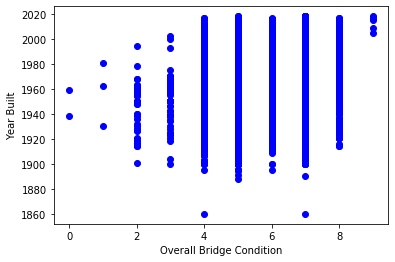

In [18]:
plt.scatter(deterioration.OvreallBridgeCndnCAT23, deterioration.YearBuilt, color='blue')
plt.ylabel("Year Built")
plt.xlabel("Overall Bridge Condition")
plt.show()

### 2.5.2 Bridge Improvement Cost vs. Bridge Length:

In [19]:
#df['LenStrImprvmnt']
#df['LenStrImprvmnt'] = df['Column1'].str[280:286] # 6 digits (xxxxx.x meters)
#df['BrImpvmt$'] = df['Column1'].str[313:319] # 6digits (eg. $55,850 = 000056 or $7,451,233 = 007451)

df['StrLenM'] = df['StrLenM'] //10

df['StrLenM'].astype('int')

df['BrImpvmt'] = df['BrImpvmt']*1000

cost = df[['StrLenM','BrImpvmt']]

cost = cost.apply(pd.to_numeric, errors='ignore')

cost.dtypes
#cost['BrImpvmt'] = cost['BrImpvmt'].astype('float')

plt.scatter(cost.BrImpvmt, cost.StrLenM, color='blue')
plt.xlabel("Bridge Length")
plt.ylabel("Improvement Cost")
plt.show()


KeyboardInterrupt: 

In [ ]:
msk = np.random.rand(len(cost)) < 0.8
train = cost[msk]
test = cost[~msk]


from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['LenStrImprvmnt']])
train_y = np.asanyarray(train[['BrImpvmt']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
#deterioration[["Year Built", "Overall Bridge Cndn CAT23"]].describe()

deterioration = deterioration.apply(pd.to_numeric, errors='ignore')

In [ ]:
deterioration.dtypes

### 2.5 Exploring Data (Bridge Deterioration vs. Year Built):

In [ ]:
avg_bore=deterioration['Year Built'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

In [ ]:
avg_cndn=deterioration['Ovreall Bridge Cndn CAT23'].astype('float').mean(axis=0)
print("Average of cndn:", avg_cndn)

In [ ]:
pip install geojson

In [ ]:
import geopandas as gpd

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [ ]:
from folium import plugins

# let's start with a clean copy of the map of California:
ca_map = folium.Map(location = [36.7783, -119.4179], zoom_start = 5)

# instantiate a mark cluster object for the incidents in the dataframe
bridges = plugins.MarkerCluster().add_to(ca_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(36.7783, -119.4179, df.FacilityCarriedbyStr):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(bridges)

#display map
ca_map

In [ ]:
ca_map = folium.Map(location = [36.7783, -119.4179], zoom_start = 12)

ca_map